In [5]:
import numpy as np

def bilinear_interpolation(x, y, points):
    """
    Perform bilinear interpolation.
    
    Parameters:
    x, y: coordinates of the point to interpolate
    points: a list of four points in the format [(x1, y1, value1), ..., (x4, y4, value4)]
    """
    
    # Sorting points to ensure they are in the correct order
    points = sorted(points)  # Sort by x, then by y
    
    # Extracting known points
    x1, y1, q11 = points[0]
    x2, y2, q21 = points[1]
    x3, y3, q12 = points[2]
    x4, y4, q22 = points[3]
    
    # Bilinear interpolation formula
    return (q11 * (x2 - x) * (y2 - y) +
            q21 * (x - x1) * (y2 - y) +
            q12 * (x2 - x) * (y - y1) +
            q22 * (x - x1) * (y - y1)) / ((x2 - x1) * (y2 - y1))

# Example usage
points = [(0, 0, 1), (1, 0, 2), (0, 1, 3), (1, 1, 4)]
x, y = 0.5, 0.5
print("Interpolated value at (0.5, 0.5):", bilinear_interpolation(x, y, points))



ZeroDivisionError: float division by zero

In [3]:
from PIL import Image
import numpy as np

def resize_image(input_image_path, output_image_path, new_width, new_height):
    with Image.open(input_image_path) as image:
        # Convert to numpy array
        data = np.asarray(image)
        
        # Get original dimensions
        old_height, old_width, num_channels = data.shape
        
        # Create a new array for the resized image
        resized_data = np.zeros((new_height, new_width, num_channels), dtype=np.uint8)
        
        for i in range(new_height):
            for j in range(new_width):
                # Map points to the original image
                x = (i / new_height) * old_height
                y = (j / new_width) * old_width
                
                # Calculate the nearest four points
                x1 = int(np.floor(x))
                y1 = int(np.floor(y))
                x2 = min(x1 + 1, old_height - 1)
                y2 = min(y1 + 1, old_width - 1)
                
                # Bilinear interpolation for each channel
                for c in range(num_channels):
                    q11 = data[x1, y1, c]
                    q21 = data[x2, y1, c]
                    q12 = data[x1, y2, c]
                    q22 = data[x2, y2, c]
                    
                    val = ((q11 * (x2 - x) * (y2 - y) +
                            q21 * (x - x1) * (y2 - y) +
                            q12 * (x2 - x) * (y - y1) +
                            q22 * (x - x1) * (y - y1)) 
                           / ((x2 - x1) * (y2 - y1)))
                    resized_data[i, j, c] = int(val)
        
        # Convert back to an image and save
        resized_image = Image.fromarray(resized_data)
        resized_image.save(output_image_path)

# Example usage
resize_image('dog.jpg', 'path_to_output_image.jpg', 200, 200)



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23364\1059407421.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return (q11 * (x2 - x) * (y2 - y) +
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23364\1059407421.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  return (q11 * (x2 - x) * (y2 - y) +


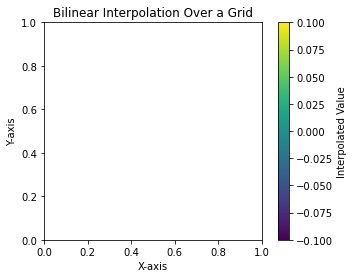

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the 'bilinear_interpolation' function from the previous example

# Create a grid
x_values = np.linspace(0, 1, 10)
y_values = np.linspace(0, 1, 10)
z_values = np.zeros((len(x_values), len(y_values)))

# Define the known points
points = [(0, 0, 1), (1, 0, 2), (0, 1, 3), (1, 1, 4)]

# Interpolate values over the grid
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        z_values[i, j] = bilinear_interpolation(x, y, points)

# Plot
plt.imshow(z_values, extent=(0, 1, 0, 1), origin='lower')
plt.colorbar(label='Interpolated Value')
plt.title('Bilinear Interpolation Over a Grid')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming you have the 'resize_image' function from the previous example

# Define paths
input_image_path = 'path_to_input_image.jpg'
resized_image_path = 'path_to_resized_image.jpg'

# Resize image
resize_image(input_image_path, resized_image_path, 200, 200)

# Load and display images
original_image = Image.open(input_image_path)
resized_image = Image.open(resized_image_path)

# Display side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('Resized Image')
plt.axis('off')

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_input_image.jpg'

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def bilinear_interpolate(image, x, y):
    x0, y0 = int(x), int(y)
    x1, y1 = x0 + 1, y0 + 1

    Ia, Ib, Ic, Id = image[x0, y0], image[x0, y1], image[x1, y0], image[x1, y1]
    wa, wb, wc, wd = (x1 - x) * (y1 - y), (x1 - x) * (y - y0), (x - x0) * (y1 - y), (x - x0) * (y - y0)
    
    return wa * Ia + wb * Ib + wc * Ic + wd * Id

# Example usage
image = np.random.rand(10, 10)  # a random image
x, y = 5.3, 6.8
interpolated_value = bilinear_interpolate(image, x, y)
interpolated_value

0.31512385477807464

In [11]:
# Bicubic interpolation is more complex and would involve using Scipy's griddata or similar methods
from scipy.interpolate import griddata

def bicubic_interpolate(image, x, y):
    grid_x, grid_y = np.mgrid[0:image.shape[0], 0:image.shape[1]]
    points = np.vstack((grid_x.ravel(), grid_y.ravel())).T
    values = image.ravel()
    return griddata(points, values, (x, y), method='cubic')

# Example usage
interpolated_value = bicubic_interpolate(image, 5.3, 6.8)
interpolated_value

array(0.45228538)

In [12]:
# Using PyKrige library for Kriging
from pykrige.ok import OrdinaryKriging
import pandas as pd

# Example data
data = pd.DataFrame({'X': [0, 1, 2], 'Y': [0, 1, 4], 'Z': [5, 3, 8]})

# Create an Ordinary Kriging model
OK = OrdinaryKriging(data['X'], data['Y'], data['Z'], variogram_model='linear')
z, ss = OK.execute('grid', np.arange(0, 3, 1), np.arange(0, 5, 1))


ModuleNotFoundError: No module named 'pykrige'

In [13]:
from scipy.interpolate import Rbf

# Example data
x, y, z = np.array([0, 1, 2]), np.array([0, 1, 4]), np.array([5, 3, 8])

# RBF interpolation
rbf = Rbf(x, y, z, function='linear')
xi, yi = np.mgrid[0:3:1, 0:5:1]
zi = rbf(xi, yi)


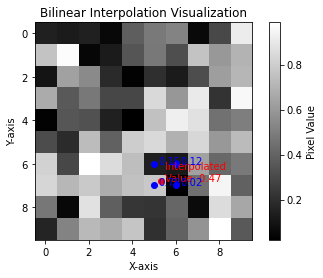

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def bilinear_interpolate(image, x, y):
    x0, y0 = int(x), int(y)
    x1, y1 = x0 + 1, y0 + 1

    if x1 >= image.shape[1]:
        x1 = x0
    if y1 >= image.shape[0]:
        y1 = y0

    Ia, Ib, Ic, Id = image[y0, x0], image[y1, x0], image[y0, x1], image[y1, x1]
    wa, wb, wc, wd = (x1 - x) * (y1 - y), (x1 - x) * (y - y0), (x - x0) * (y1 - y), (x - x0) * (y - y0)
    
    return wa * Ia + wb * Ib + wc * Ic + wd * Id

# Example usage
image = np.random.rand(10, 10)  # a random image
x, y = 5.3, 6.8
interpolated_value = bilinear_interpolate(image, x, y)

# Visualization
plt.imshow(image, cmap='gray')
plt.colorbar(label='Pixel Value')
plt.scatter([x], [y], color='red')  # interpolated point
plt.text(x+0.2, y, f'Interpolated\nValue: {interpolated_value:.2f}', color='red')

# Marking the nearby grid points
for px, py in [(int(x), int(y)), (int(x)+1, int(y)), (int(x), int(y)+1), (int(x)+1, int(y)+1)]:
    if px < image.shape[1] and py < image.shape[0]:
        plt.scatter([px], [py], color='blue')
        plt.text(px+0.2, py, f'{image[py, px]:.2f}', color='blue')

plt.title('Bilinear Interpolation Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


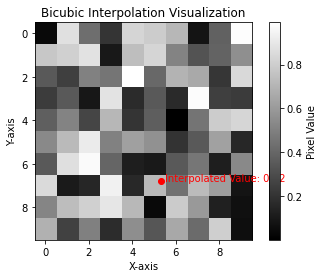

In [15]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

def bicubic_interpolate(image, x, y):
    """
    Perform bicubic interpolation on an image at a specific point (x, y).
    
    :param image: 2D numpy array representing the image
    :param x: x-coordinate for interpolation
    :param y: y-coordinate for interpolation
    :return: interpolated value at point (x, y)
    """
    grid_x, grid_y = np.mgrid[0:image.shape[0], 0:image.shape[1]]
    points = np.vstack((grid_x.ravel(), grid_y.ravel())).T
    values = image.ravel()
    return griddata(points, values, (x, y), method='cubic')

# Create a sample image for demonstration
image = np.random.rand(10, 10)  # A 10x10 random image

# Define the point for interpolation
x, y = 5.3, 6.8

# Perform bicubic interpolation
interpolated_value = bicubic_interpolate(image, x, y)

# Visualization
plt.imshow(image, cmap='gray')
plt.colorbar(label='Pixel Value')
plt.scatter([x], [y], color='red')  # Highlight the interpolated point
plt.text(x + 0.2, y, f'Interpolated Value: {interpolated_value:.2f}', color='red')
plt.title('Bicubic Interpolation Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


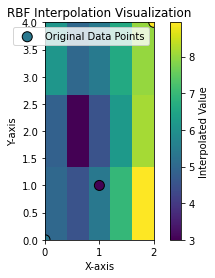

In [16]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt

# Step 1: Setup Example Data
# Example data points
x, y, z = np.array([0, 1, 2]), np.array([0, 1, 4]), np.array([5, 3, 8])

# Step 2: Perform RBF Interpolation
# Creating the RBF interpolator
rbf = Rbf(x, y, z, function='linear')
# Defining the grid for interpolation
xi, yi = np.mgrid[0:3:1, 0:5:1]
# Performing the interpolation
zi = rbf(xi, yi)

# Step 3: Visualization
# Plotting the original data points
plt.scatter(x, y, c=z, s=100, edgecolor='black', label='Original Data Points')
# Plotting the interpolated surface
plt.imshow(zi, extent=[0, 2, 0, 4], origin='lower', cmap='viridis')
plt.colorbar(label='Interpolated Value')
# Additional plot settings
plt.title('RBF Interpolation Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


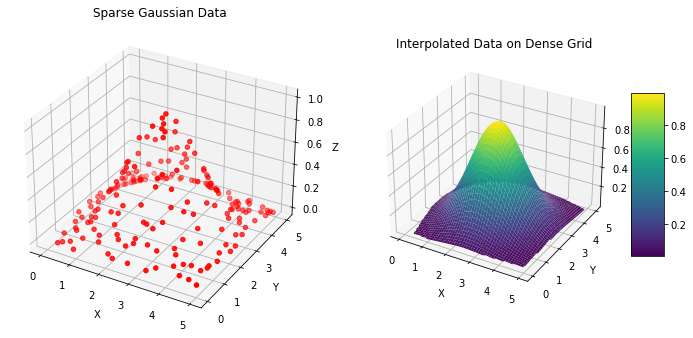

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Step 1: Generate Gaussian Data
def gaussian_2d(x, y, x0, y0, xsig, ysig):
    return np.exp(-0.5 * (((x - x0) / xsig)**2 + ((y - y0) / ysig)**2))

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)
x, y = np.meshgrid(x, y)
z = gaussian_2d(x, y, 2.5, 2.5, 1, 1)

# Step 2: Sample Sparsely
# Randomly select a number of points from the Gaussian data
np.random.seed(0)
indices = np.random.choice(x.size, size=200, replace=False)
sparse_x, sparse_y, sparse_z = x.ravel()[indices], y.ravel()[indices], z.ravel()[indices]

# Step 3: Interpolate
# Create a dense grid
xi, yi = np.linspace(0, 5, 100), np.linspace(0, 5, 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((sparse_x, sparse_y), sparse_z, (xi, yi), method='cubic')

# Step 4: Visualization
fig = plt.figure(figsize=(12, 6))

# Plot sparse data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(sparse_x, sparse_y, sparse_z, color='red')
ax1.set_title('Sparse Gaussian Data')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot interpolated data
ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=5)
ax2.set_title('Interpolated Data on Dense Grid')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.show()


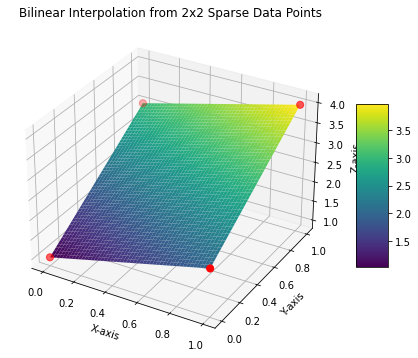

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Step 1: Create Sparse Data Points
# Define 2x2 grid of points
x = np.array([0, 1])
y = np.array([0, 1])
x, y = np.meshgrid(x, y)
z = np.array([[1, 2], [3, 4]])  # Example values on the grid

# Flatten the arrays for interpolation
points = np.vstack((x.ravel(), y.ravel())).T
values = z.ravel()

# Step 2: Interpolate onto a Dense Grid
# Create a dense grid
xi, yi = np.linspace(0, 1, 50), np.linspace(0, 1, 50)
xi, yi = np.meshgrid(xi, yi)
zi = griddata(points, values, (xi, yi), method='linear')

# Step 3: Visualize the Results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot interpolated data as surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Plot original sparse data as points
ax.scatter(x, y, z, color='red', s=50)

# Add color bar and labels
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_title('Bilinear Interpolation from 2x2 Sparse Data Points')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()


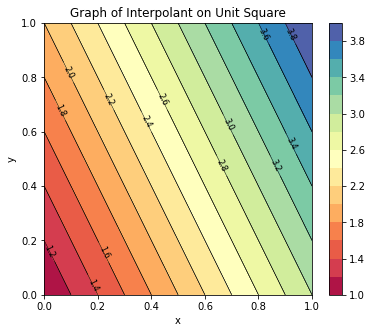

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Step 1: Create Sparse Data Points
# Define a 2x2 grid of points
x = np.array([0, 0, 1, 1])
y = np.array([0, 1, 0, 1])
z = np.array([1, 2, 3, 4])  # Example values at the corners of the unit square

# Step 2: Create a Dense Grid for Interpolation
xi, yi = np.linspace(0, 1, 100), np.linspace(0, 1, 100)
xi, yi = np.meshgrid(xi, yi)

# Step 3: Perform Bilinear Interpolation
zi = griddata((x, y), z, (xi, yi), method='linear')

# Step 4: Generate the Contour Plot with Labels
plt.figure(figsize=(6, 5))
contour = plt.contourf(xi, yi, zi, levels=15, cmap='Spectral')
plt.colorbar(contour)

# Add contour labels
plt.contour(xi, yi, zi, levels=15, colors='black', linewidths=0.5)
plt.clabel(plt.contour(xi, yi, zi, levels=15, colors='black', linewidths=0.5), inline=True, fontsize=8)

# Step 5: Add Plot Titles and Labels
plt.title('Graph of Interpolant on Unit Square')
plt.xlabel('x')
plt.ylabel('y')

# Step 6: Show the Plot
plt.show()


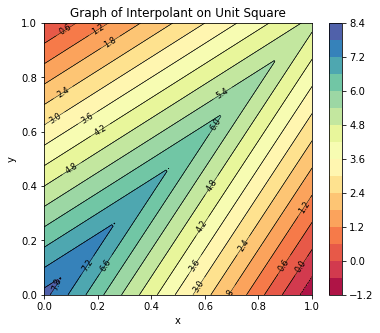

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Step 1: Create Sparse Data Points
# Define a 2x2 grid of points
x = np.array([0, 0, 1, 1])
y = np.array([0, 1, 0, 1])
z = np.array([8, 0, -1, 5])  # Example values at the corners of the unit square

# Step 2: Create a Dense Grid for Interpolation
xi, yi = np.linspace(0, 1, 100), np.linspace(0, 1, 100)
xi, yi = np.meshgrid(xi, yi)

# Step 3: Perform Bilinear Interpolation
zi = griddata((x, y), z, (xi, yi), method='linear')

# Step 4: Generate the Contour Plot with Labels
plt.figure(figsize=(6, 5))
contour = plt.contourf(xi, yi, zi, levels=15, cmap='Spectral')
plt.colorbar(contour)

# Add contour labels
plt.contour(xi, yi, zi, levels=15, colors='black', linewidths=0.5)
plt.clabel(plt.contour(xi, yi, zi, levels=15, colors='black', linewidths=0.5), inline=True, fontsize=8)

# Step 5: Add Plot Titles and Labels
plt.title('Graph of Interpolant on Unit Square')
plt.xlabel('x')
plt.ylabel('y')

# Step 6: Show the Plot
plt.show()


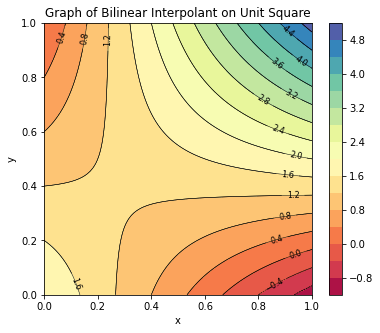

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the bilinear interpolation function
def bilinear_interpolation(x, y, v, xi, yi):
    x1, x2 = x
    y1, y2 = y
    q11, q12, q21, q22 = v

    return (q11 * (x2 - xi) * (y2 - yi) +
            q21 * (xi - x1) * (y2 - yi) +
            q12 * (x2 - xi) * (yi - y1) +
            q22 * (xi - x1) * (yi - y1)) / ((x2 - x1) * (y2 - y1))

# Step 2: Define sparse data points
# Corners of the unit square
x = np.array([0, 1, 0, 1])
y = np.array([0, 0, 1, 1])
# Values at the corners
# z = np.array([1, 2, 3, 4])
z = np.array([2, 0, -1, 5])  # Example values at the corners of the unit square

# Step 3: Create a dense grid of points where we want to interpolate
xi = np.linspace(0, 1, 100)
yi = np.linspace(0, 1, 100)
xi, yi = np.meshgrid(xi, yi)

# Step 4: Perform bilinear interpolation over the grid
zi = np.array([[bilinear_interpolation((0, 1), (0, 1), (2, 0, -1, 5), xj, yj) for xj in xi[0]] for yj in yi[:, 0]])

# Step 5: Generate the contour plot with labels
plt.figure(figsize=(6, 5))
contour = plt.contourf(xi, yi, zi, levels=15, cmap='Spectral')
plt.colorbar(contour)
plt.contour(xi, yi, zi, levels=15, colors='black', linewidths=0.5)
plt.clabel(plt.contour(xi, yi, zi, levels=15, colors='black', linewidths=0.5), inline=True, fontsize=8)

# Step 6: Add titles and labels
plt.title('Graph of Bilinear Interpolant on Unit Square')
plt.xlabel('x')
plt.ylabel('y')

# Step 7: Show the plot
plt.show()


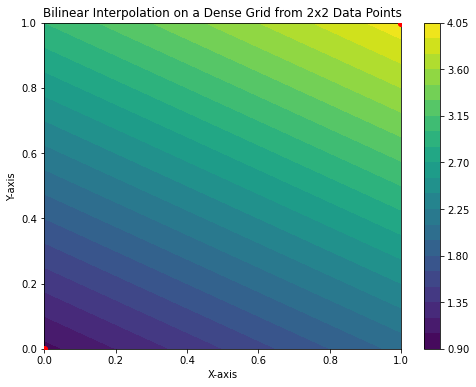

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define a bilinear interpolation function.
def bilinear_interpolation(x, y, v, xi, yi):
    x1, x2, y1, y2 = x[0], x[1], y[0], y[1]
    q11, q21, q12, q22 = v[0], v[1], v[2], v[3]
    
    return (q11 * (x2 - xi) * (y2 - yi) +
            q21 * (xi - x1) * (y2 - yi) +
            q12 * (x2 - xi) * (yi - y1) +
            q22 * (xi - x1) * (yi - y1)) / ((x2 - x1) * (y2 - y1))

# Step 2: Define the sparse 2x2 data points.
x = np.array([0, 1])
y = np.array([0, 1])
z = np.array([1, 2, 3, 4])  # Values at the 2x2 grid corners

# Step 3: Create a dense grid.
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Step 4: Apply bilinear interpolation over the dense grid.
zi = np.array([[bilinear_interpolation(x, y, z, xj, yj) for xj in xi[0]] for yj in yi[:, 0]])

# Step 5: Generate the contour plot.
plt.figure(figsize=(8, 6))
contour = plt.contourf(xi, yi, zi, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.title('Bilinear Interpolation on a Dense Grid from 2x2 Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Optional: Plot the original sparse grid points.
plt.scatter(x.repeat(2), y.repeat(2), color='red', zorder=10)

plt.show()


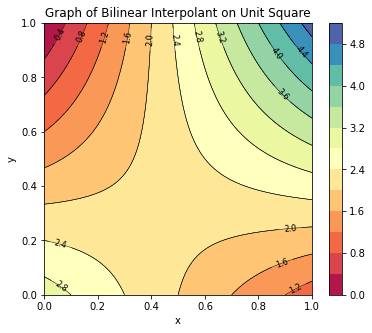

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the bilinear interpolation function
def bilinear_interpolation(x, y, v, xi, yi):
    x1, x2 = x
    y1, y2 = y
    q11, q12, q21, q22 = v
    f1 = (q11 * (x2 - xi) + q21 * (xi - x1))/(x2 - x1)
    f2 = (q12 * (x2 - xi) + q22 * (xi - x1))/(x2 - x1)

    return (f1 * (y2 - yi) + f2 * (yi - y1)) / (y2 - y1)


# Step 2: Define sparse data points
# Corners of the unit square
x1, x2 = 0, 1
y1, y2 = 0, 1
# Values at the corners
z = np.array([3, 0, 1, 5])  # Example values at the corners of the unit square
# (x1,y1),(x1,y2)(x2,y1),(x2,y2)

# Step 3: Create a dense grid of points where we want to interpolate
xi = np.linspace(x1, x2, 100)
yi = np.linspace(y1, y2, 100)
xi, yi = np.meshgrid(xi, yi)

# Step 4: Perform bilinear interpolation over the grid
zi = np.array([[bilinear_interpolation((x1, x2), (y1, y2), z, xj, yj) for xj in xi[0]] for yj in yi[:, 0]])

# Step 5: Generate the contour plot with labels
plt.figure(figsize=(6, 5))
contour = plt.contourf(xi, yi, zi, levels=15, cmap='Spectral')
plt.colorbar(contour)
plt.contour(xi, yi, zi, levels=15, colors='black', linewidths=0.5)
plt.clabel(plt.contour(xi, yi, zi, levels=15, colors='black', linewidths=0.5), inline=True, fontsize=8)

# Step 6: Add titles and labels
plt.title('Graph of Bilinear Interpolant on Unit Square')
plt.xlabel('x')
plt.ylabel('y')

# Step 7: Show the plot
plt.show()


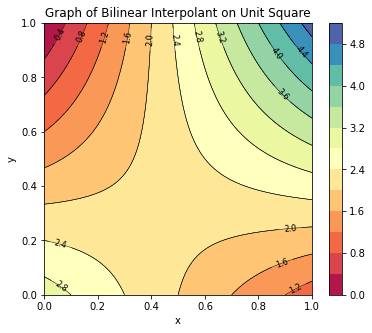

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Vectorized bilinear interpolation function
def bilinear_interpolation(x, y, v, xi, yi):
    x1, x2 = x
    y1, y2 = y
    q11, q12, q21, q22 = v

    # Compute the factors for interpolation
    fx1 = (x2 - xi) / (x2 - x1)
    fx2 = (xi - x1) / (x2 - x1)
    fy1 = (y2 - yi) / (y2 - y1)
    fy2 = (yi - y1) / (y2 - y1)

    # Perform the interpolation for all points at once
    return (q11 * fx1 * fy1 +
            q21 * fx2 * fy1 +
            q12 * fx1 * fy2 +
            q22 * fx2 * fy2)

# Step 2: Define sparse data points
x = np.array([0, 1])
y = np.array([0, 1])
z = np.array([3, 0, 1, 5])  # Values at the corners of the unit square: q11, q12, q21, q22

# Step 3: Create a dense grid of points for interpolation
xi, yi = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))

# Step 4: Perform bilinear interpolation over the grid
zi = bilinear_interpolation(x, y, z, xi, yi)


# Step 5: Generate the contour plot with labels
plt.figure(figsize=(6, 5))
contour = plt.contourf(xi, yi, zi, levels=15, cmap='Spectral')
plt.colorbar(contour)
plt.contour(xi, yi, zi, levels=15, colors='black', linewidths=0.5)
plt.clabel(plt.contour(xi, yi, zi, levels=15, colors='black', linewidths=0.5), inline=True, fontsize=8)

# Step 6: Add titles and labels
plt.title('Graph of Bilinear Interpolant on Unit Square')
plt.xlabel('x')
plt.ylabel('y')

# Step 7: Show the plot
plt.show()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23364\2207778277.py:18: RuntimeWarning: invalid value encountered in double_scalars
  return (values[y1, x1] * x2_x * y2_y +


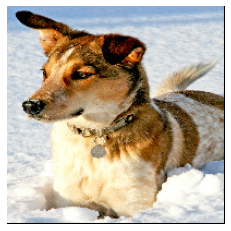

In [36]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Vectorized bilinear interpolation function
def bilinear_interpolation(x, y, values, xi, yi):
    # Assumes values are indexed [y, x]
    x1, x2 = x
    y1, y2 = y

    # Interpolation weights
    x2_x = x2 - xi
    y2_y = y2 - yi
    xi_x1 = xi - x1
    yi_y1 = yi - y1

    # Bilinear interpolation
    return (values[y1, x1] * x2_x * y2_y +
            values[y1, x2] * xi_x1 * y2_y +
            values[y2, x1] * x2_x * yi_y1 +
            values[y2, x2] * xi_x1 * yi_y1) / ((x2 - x1) * (y2 - y1))

# Step 2: Read the original image
original_image = Image.open('dog.jpg')  # Replace with your image path
original_image = original_image.convert('RGB')  # Ensure image is in RGB mode
original_pixels = np.array(original_image)

# Step 3: Define new size and create a grid for the resized image
new_width, new_height = 200, 200  # Example new size
new_x = np.linspace(0, original_pixels.shape[1] - 1, new_width)
new_y = np.linspace(0, original_pixels.shape[0] - 1, new_height)
new_xi, new_yi = np.meshgrid(new_x, new_y)

# Step 4: Map coordinates of the new image to the original image coordinates
mapped_x = new_xi.astype(int)
mapped_y = new_yi.astype(int)

# Step 5: Construct new image using bilinear interpolation
resized_image_pixels = np.zeros((new_height, new_width, 3), dtype=np.uint8)
for channel in range(3):  # Loop over color channels
    for i in range(new_height):
        for j in range(new_width):
            x_coords = (mapped_x[i, j], min(mapped_x[i, j] + 1, original_pixels.shape[1] - 1))
            y_coords = (mapped_y[i, j], min(mapped_y[i, j] + 1, original_pixels.shape[0] - 1))
            pixel_value = bilinear_interpolation(
                x_coords, y_coords,
                original_pixels[:, :, channel],
                new_xi[i, j], new_yi[i, j]
            )
            resized_image_pixels[i, j, channel] = np.clip(pixel_value, 0, 255)

# Step 6: Convert the interpolated array to an image and display it
resized_image = Image.fromarray(resized_image_pixels)
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


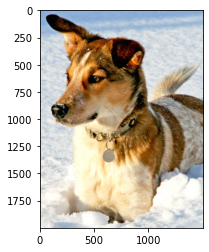

In [37]:
plt.imshow(original_image)

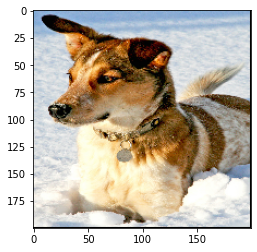

In [38]:
plt.imshow(resized_image)

In [43]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Define the bilinear interpolation function
def bilinear_interpolation(src, x, y):
    x0 = np.floor(x).astype(int)
    x1 = x0 + 1
    y0 = np.floor(y).astype(int)
    y1 = y0 + 1

    x0 = np.clip(x0, 0, src.shape[1] - 1)
    x1 = np.clip(x1, 0, src.shape[1] - 1)
    y0 = np.clip(y0, 0, src.shape[0] - 1)
    y1 = np.clip(y1, 0, src.shape[0] - 1)

    Ia = src[y0, x0]
    Ib = src[y1, x0]
    Ic = src[y0, x1]
    Id = src[y1, x1]

    wa = (x1 - x) * (y1 - y)
    wb = (x1 - x) * (y - y0)
    wc = (x - x0) * (y1 - y)
    wd = (x - x0) * (y - y0)

    return wa[..., np.newaxis] * Ia + wb[..., np.newaxis] * Ib + wc[..., np.newaxis] * Ic + wd[..., np.newaxis] * Id

# Step 2: Read the original image
original_image = Image.open('dog.jpg')[:30:30,:] 
original_image = original_image.convert('RGB')  # Ensure image is in RGB mode
original_pixels = np.array(original_image)

# Step 3: Define new size and create a grid for the resized image
new_width, new_height = 200, 200  # Example new size
x_ratio = original_pixels.shape[1] / new_width
y_ratio = original_pixels.shape[0] / new_height

new_x = (np.arange(new_width) + 0.5) * x_ratio - 0.5
new_y = (np.arange(new_height) + 0.5) * y_ratio - 0.5

# Step 4: Perform bilinear interpolation over the grid
new_xi, new_yi = np.meshgrid(new_x, new_y)
resized_pixels = bilinear_interpolation(original_pixels, new_xi, new_yi)

# Step 5: Convert the interpolated array to an image and display it
resized_image = Image.fromarray(np.clip(resized_pixels, 0, 255).astype('uint8'))
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


TypeError: 'JpegImageFile' object is not subscriptable

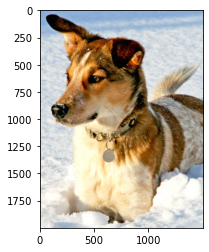

In [46]:
original_image = Image.open('dog.jpg')
# original_image = original_image.convert('RGB')  # Ensure image is in RGB mode
np.array(original_image)
plt.imshow(original_image)

[-0.475 -0.425 -0.375 -0.325 -0.275 -0.225 -0.175 -0.125 -0.075 -0.025
  0.025  0.075  0.125  0.175  0.225  0.275  0.325  0.375  0.425  0.475
  0.525  0.575  0.625  0.675  0.725  0.775  0.825  0.875  0.925  0.975
  1.025  1.075  1.125  1.175  1.225  1.275  1.325  1.375  1.425  1.475
  1.525  1.575  1.625  1.675  1.725  1.775  1.825  1.875  1.925  1.975
  2.025  2.075  2.125  2.175  2.225  2.275  2.325  2.375  2.425  2.475
  2.525  2.575  2.625  2.675  2.725  2.775  2.825  2.875  2.925  2.975
  3.025  3.075  3.125  3.175  3.225  3.275  3.325  3.375  3.425  3.475
  3.525  3.575  3.625  3.675  3.725  3.775  3.825  3.875  3.925  3.975
  4.025  4.075  4.125  4.175  4.225  4.275  4.325  4.375  4.425  4.475
  4.525  4.575  4.625  4.675  4.725  4.775  4.825  4.875  4.925  4.975
  5.025  5.075  5.125  5.175  5.225  5.275  5.325  5.375  5.425  5.475
  5.525  5.575  5.625  5.675  5.725  5.775  5.825  5.875  5.925  5.975
  6.025  6.075  6.125  6.175  6.225  6.275  6.325  6.375  6.425  6.475
  6.52

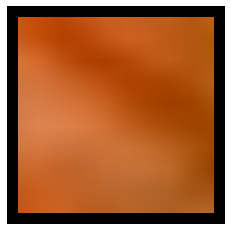

In [79]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Define the bilinear interpolation function
def bilinear_interpolation(src, x, y):
    x1 = np.floor(x).astype(int)
    x2 = x1 + 1
    y1 = np.floor(y).astype(int)
    y2 = y1 + 1

    x1 = np.clip(x1, 0, src.shape[1] - 1)
    x2 = np.clip(x2, 0, src.shape[1] - 1)
    y1 = np.clip(y1, 0, src.shape[0] - 1)
    y2 = np.clip(y2, 0, src.shape[0] - 1)
    
#     x = np.clip(x, 0, src.shape[1] - 1)
#     y = np.clip(y, 0, src.shape[0] - 1)
    
    print(x[0])

    I11 = src[y1, x1]  # Top-left
    I12 = src[y2, x1]  # Bottom-left
    I21 = src[y1, x2]  # Top-right
    I22 = src[y2, x2]  # Bottom-right

    w11 = (x2 - x) * (y2 - y)
    w12 = (x2 - x) * (y - y1)
    w21 = (x - x1) * (y2 - y)
    w22 = (x - x1) * (y - y1)

    print(I11.shape, x1.shape, src.shape, x1, w11)
    return w11[..., np.newaxis] * I11 + w12[..., np.newaxis] * I12 + w21[..., np.newaxis] * I21 + w22[..., np.newaxis] * I22

# Step 2: Read the original image
original_image = Image.open('dog.jpg')
original_pixels = np.array(original_image)[320:330,320:330,:] 

# Step 3: Define new size and create a grid for the resized image
new_width, new_height = 200, 200  # Example new size
# x_ratio = (original_pixels.shape[1]-1) / (new_width-1)
# y_ratio = (original_pixels.shape[0]-1) / (new_height-1)
x_ratio = original_pixels.shape[1] / new_width
y_ratio = original_pixels.shape[0] / new_height

new_x = (np.arange(new_width) + 0.5) * x_ratio - 0.5
new_y = (np.arange(new_height) + 0.5) * y_ratio - 0.5
# new_x = (np.arange(new_width) + 0.5) * x_ratio
# new_y = (np.arange(new_height) + 0.5) * y_ratio
# new_x = np.arange(new_width) * x_ratio + 0.5
# new_y = np.arange(new_height) * y_ratio + 0.5

# Step 4: Perform bilinear interpolation over the grid
new_xi, new_yi = np.meshgrid(new_x, new_y)
resized_pixels = bilinear_interpolation(original_pixels, new_xi, new_yi)

# Step 5: Convert the interpolated array to an image and display it
resized_image = Image.fromarray(np.clip(resized_pixels, 0, 255).astype('uint8'))
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


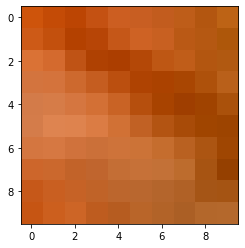

In [56]:
plt.imshow(original_pixels)

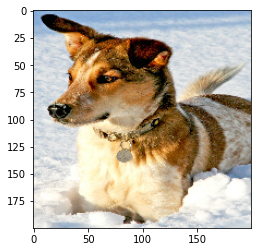

In [41]:
plt.imshow(resized_image)

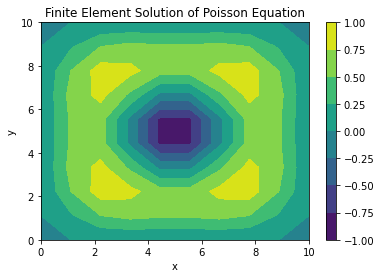

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

# Domain settings
size = 10  # Size of the square domain
n = 10     # Number of nodes per dimension

# Generate nodes
x = np.linspace(0, size, n)
y = np.linspace(0, size, n)
X, Y = np.meshgrid(x, y)
nodes = np.vstack((X.flatten(), Y.flatten())).T

# Generate elements (assuming square elements)
elements = []
for i in range(n - 1):
    for j in range(n - 1):
        elements.append([i*n + j, i*n + (j + 1), (i + 1)*n + (j + 1), (i + 1)*n + j])

# System setup
A = lil_matrix((n*n, n*n))
b = -np.ones(n*n)  # Assuming f = -1

# Assembly of the matrix A and vector b
for el in elements:
    for i in el:
        for j in el:
            if i == j:
                A[i, j] = 4
            elif j in el:
                A[i, j] = -1

# Apply Dirichlet boundary conditions (u = 0 on the boundary)
for i in range(n):
    for j in [0, n-1]:
        idx = i*n + j
        A[idx, :] = 0
        A[idx, idx] = 1
        b[idx] = 0

    for j in [0, n-1]:
        idx = j*n + i
        A[idx, :] = 0
        A[idx, idx] = 1
        b[idx] = 0

# Solve the linear system
u = spsolve(A.tocsr(), b)

# Reshape the solution to 2D for plotting
U = u.reshape((n, n))

# Plotting
plt.contourf(X, Y, U, cmap='viridis')
plt.colorbar()
plt.title('Finite Element Solution of Poisson Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [83]:
A

<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 612 stored elements in List of Lists format>